In [ ]:
# import pandas as pd
# import ast
# df = pd.read_csv('../resource/per_commit_threthold7.csv')
# df.head(10)

,commit_id,changed_src_files,categories,complexity,lloc,contains_bug,fixes,num_product_files
0,0000e4462e7343152ee0f6730fc8e50e8810b7f4,['camel-core/src/main/java/org/apache/camel/im...,"[4, 2]",21,67,False,NaN,2
1,00026ef1b16b51145c44200099f110dea62b5464,['components/camel-docker/src/main/java/org/ap...,"[3, 4]",20,68,False,NaN,2
2,000775ffae617e61ee57901d26c8dfb607809ab6,['components/camel-pulsar/src/main/java/org/ap...,"[2, 1, 1]",15,74,False,NaN,3
3,00077a0aa1eff2ca38f457d8ecc75cbe8918db0f,['components/camel-cxf-transport/src/main/java...,[4],27,127,False,NaN,1
4,000938a9e22a4b214db8a6b79fc5564e060442b1,['components/camel-sjms/src/main/java/org/apac...,[4],30,143,False,NaN,1
5,000e09a80874cc6b3ee748504611d4bb45be3483,['components/camel-reactive-streams/src/main/j...,"[4, 3, 2, 1, 1]",125,595,True,"[""a1830d5a2788ec26b34e48732026b3d706f615dd"", ""...",5
6,0010857418032ceccfa3abc95ca1d8436926bf10,['components/camel-cxf/src/main/java/org/apach...,[4],31,118,True,"[""6fb053ace95bb051c47d53c0656b7806a04bf35e""]",1
7,0018bbdd33ea214cfd1e58ccac3dff9e72c528f2,['camel-core/src/main/java/org/apache/camel/pr...,"[2, 1]",93,270,True,"[""55901baa31b099f4afcf182ab3b7d3df0b08f5e5""]",2
8,001969206c02dfe49b63c1a6d80985f0edc8eae3,['components/camel-jetty/src/main/java/org/apa...,[4],6,13,False,NaN,1
9,0019f0b9ef5900d928d00a206c4bd1652912babd,['camel-core/src/main/java/org/apache/camel/mo...,[4],0,0,False,NaN,1


In [144]:
# df2 = df[df["contains_bug"]].copy()
# # df2["fixes"] = df2["fixes"].apply(eval)
# # df2["categories"] = df2["categories"].apply(eval)

# df2.set_index("commit_id", inplace=True)
# df.set_index("commit_id", inplace=True)

In [146]:
# #バグ修正コミットの特徴を調べる
# bug_fix_commit_id = []
# level_list = []
# complexity_list = []
# lloc_list = []
# label_list = []

# for idx, row in df2.iterrows():
#     for commit_id in ast.literal_eval(row["fixes"]):
#         if commit_id not in df.index or commit_id in bug_fix_commit_id:
#             continue
#         row2 = df.loc[commit_id]
#         bug_fix_commit_id.append(commit_id)
#         level_list.append(max(ast.literal_eval(row2["categories"])))
#         complexity_list.append(row2["complexity"])
#         lloc_list.append(row2["lloc"]) 
#         label_list.append(row2["contains_bug"])
        

In [148]:
# len(bug_fix_commit_id)

3449

In [149]:
# bug_fix_commit_df = pd.DataFrame(
#     data={
#         "commit_id": bug_fix_commit_id,
#         "max_level": level_list,
#         "complexity": complexity_list,
#         "lloc": lloc_list,
#         "contains_bug": label_list
#     }
# )
# bug_fix_commit_df.to_csv("bug_fix_commit.csv", index=False)

In [150]:
import pandas as pd
bug_fix_commit_df = pd.read_csv("../resource/result/bug_fix_commit.csv")
bug_fix_commit_df.head()

,commit_id,max_level,complexity,lloc,contains_bug
0,1fe30377164ccbbcbefc0183c8c784988767c28c,3,0,0,False
1,55901baa31b099f4afcf182ab3b7d3df0b08f5e5,4,444,1477,True
2,efca3b12a326082e685494d51308c6a1f5f27114,4,430,1891,False
3,b0ac731294b9cda85590d729f9a5c6f35e09844f,1,1,3,True
4,edd4e628690cf0a2ce03b537f88a3075bc29e8c1,4,103,373,True


In [151]:
bug_fix_commit_df.shape

(3449, 5)

In [152]:
bug_commits = bug_fix_commit_df["contains_bug"].value_counts().get(True, 0)
print(bug_commits)
bug_commits / bug_fix_commit_df.shape[0]

1286


0.37286169904320093

In [153]:
for i in range(1, 5):
    bug_commits = bug_fix_commit_df[bug_fix_commit_df["max_level"]==i]["contains_bug"].value_counts().get(True, 0)
    per_level_commits = len(bug_fix_commit_df[bug_fix_commit_df["max_level"]==i])
    ratio = bug_commits / per_level_commits
    print(f"レベル{str(i)}, コミット数：{per_level_commits}, バグコミット数：{bug_commits}, バグ率：{ratio}")


レベル1, コミット数：484, バグコミット数：144, バグ率：0.2975206611570248
レベル2, コミット数：1091, バグコミット数：310, バグ率：0.2841429880843263
レベル3, コミット数：249, バグコミット数：123, バグ率：0.4939759036144578
レベル4, コミット数：1625, バグコミット数：709, バグ率：0.4363076923076923


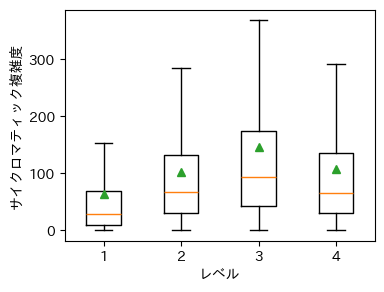

In [157]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントのサポートを簡単に設定できるライブラリ
import numpy as np

# データフレーム（df）の準備
categories = sorted(bug_fix_commit_df['max_level'].unique())
category_indices = {category: idx for idx, category in enumerate(categories)}
category_data = {category: bug_fix_commit_df[bug_fix_commit_df['max_level'] == category]['complexity'].values for category in categories}

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(4, 3))

# データをプロット
ax.boxplot([category_data[category] for category in categories], vert=True, patch_artist=False, showmeans=True, sym="")

# タイトル、ラベル、X軸のラベルを設定
# ax.set_title('Category-wise LLOC Distribution')
ax.set_xlabel('レベル')
ax.set_ylabel('サイクロマティック複雑度')
ax.set_xticklabels(categories)

# グラフの表示
plt.show()


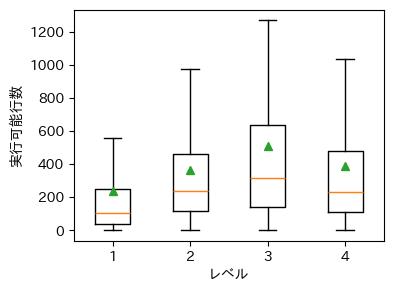

In [156]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントのサポートを簡単に設定できるライブラリ
import numpy as np

# データフレーム（df）の準備
categories = sorted(bug_fix_commit_df['max_level'].unique())
category_indices = {category: idx for idx, category in enumerate(categories)}
category_data = {category: bug_fix_commit_df[bug_fix_commit_df['max_level'] == category]['lloc'].values for category in categories}

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(4, 3))

# データをプロット
ax.boxplot([category_data[category] for category in categories], vert=True, patch_artist=False, showmeans=True, sym="")

# タイトル、ラベル、X軸のラベルを設定
# ax.set_title('Category-wise LLOC Distribution')
ax.set_xlabel('レベル')
ax.set_ylabel('実行可能行数')
ax.set_xticklabels(categories)

# グラフの表示
plt.show()
